In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os


In [5]:
customer= pd.read_csv('Customer Acqusition.csv')
repay=pd.read_csv('Repayment.csv')
spend=pd.read_csv('spend.csv')

In [7]:
customer.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [8]:
repay.head()

,SL No:,Customer,Month,Amount
0,1,A1,12-Jan-04,495414.75
1,2,A1,03-Jan-04,245899.02
2,3,A1,15-Jan-04,259490.06
3,4,A1,25-Jan-04,437555.12
4,5,A1,17-Jan-05,165972.88


In [9]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [10]:
customer.dtypes

No            int64
Customer     object
Age           int64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

In [11]:
repay.dtypes

SL No:        int64
Customer     object
Month        object
Amount      float64
dtype: object

In [12]:
spend.dtypes

Sl No:        int64
Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [13]:
spend.isnull().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [14]:
customer.isnull().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [15]:
repay.isnull().sum()

SL No:      0
Customer    0
Month       0
Amount      0
dtype: int64

# In case age is less than 18, replace it with mean of age values.

In [16]:
mean_age=customer['Age'].mean()

In [17]:
print('The mean of Age column is',mean_age)

The mean of Age column is 46.49


In [18]:
customer.loc[customer['Age']<18,'Age']=customer['Age'].mean()

In [19]:
mean_new=customer['Age'].mean()

In [20]:
print('new Mean of Age Column is',mean_new)

new Mean of Age Column is 48.399399999999986


In [21]:
customer.loc[customer['Age']<18,'Age']

Series([], Name: Age, dtype: float64)

In [22]:
print('All the customers who have age less than 18 have been replace by mean of the age column.')

All the customers who have age less than 18 have been replace by mean of the age column.


# In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [23]:
customer.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [27]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [24]:
customer_spend=pd.merge(left=customer,right=spend,on='Customer',how='inner')

In [25]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07


In [26]:
customer_spend.shape

(1500, 12)

In [27]:
#customer spend more than limit
customer_spend[customer_spend['Amount']>customer_spend['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
18,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,104,3-Jan-04,RENTAL,199554.72
19,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,118,28-Feb-05,TRAIN TICKET,376887.49
20,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,132,6-Apr-04,BUS TICKET,439648.53
21,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,146,23-Nov-04,PETRO,384078.73
22,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,160,3-Sep-05,JEWELLERY,117089.16
...,...,...,...,...,...,...,...,...,...,...,...,...
1486,87,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,89,30-Mar-06,RENTAL,483886.62
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22


In [28]:
#replace wuth 50% of customer's limit
customer_spend.loc[customer_spend['Amount']>customer_spend['Limit'],'Amount']=(50*customer_spend['Limit']).div(100)

In [29]:
customer_spend[customer_spend['Amount']>customer_spend['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount


# Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [30]:
customer.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [31]:
repay.head()

,SL No:,Customer,Month,Amount
0,1,A1,12-Jan-04,495414.75
1,2,A1,03-Jan-04,245899.02
2,3,A1,15-Jan-04,259490.06
3,4,A1,25-Jan-04,437555.12
4,5,A1,17-Jan-05,165972.88


In [32]:
#merge both
customer_repay=pd.merge(left=repay,right=customer,on='Customer',how='inner')

In [33]:
customer_repay.head()

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,1,A1,12-Jan-04,495414.75,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A1,03-Jan-04,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,3,A1,15-Jan-04,259490.06,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,4,A1,25-Jan-04,437555.12,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,5,A1,17-Jan-05,165972.88,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [34]:
#repay amount more tham limit
customer_repay[customer_repay['Amount']>customer_repay['Limit']]

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
18,8,A8,05-Feb-04,156913.59,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
19,110,A8,12-Jan-04,350999.98,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
20,124,A8,31-Mar-06,155642.95,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
21,138,A8,09-May-05,145457.38,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
22,152,A8,08-May-06,361184.89,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
...,...,...,...,...,...,...,...,...,...,...,...
1494,259,A7,06-May-06,400375.97,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,295,A7,03-Dec-05,429700.12,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,313,A7,23-Feb-05,344628.72,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1498,331,A7,31-Mar-06,336264.37,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


In [35]:
#replace payment with limit
customer_repay.loc[customer_repay['Amount']>customer_repay['Limit'],'Amount']=customer_repay['Limit']

In [36]:
customer_repay[customer_repay['Amount']>customer_repay['Limit']]

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment


# How many distinct customers exist?

In [37]:
customer['Segment'].value_counts()

Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: Segment, dtype: int64

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


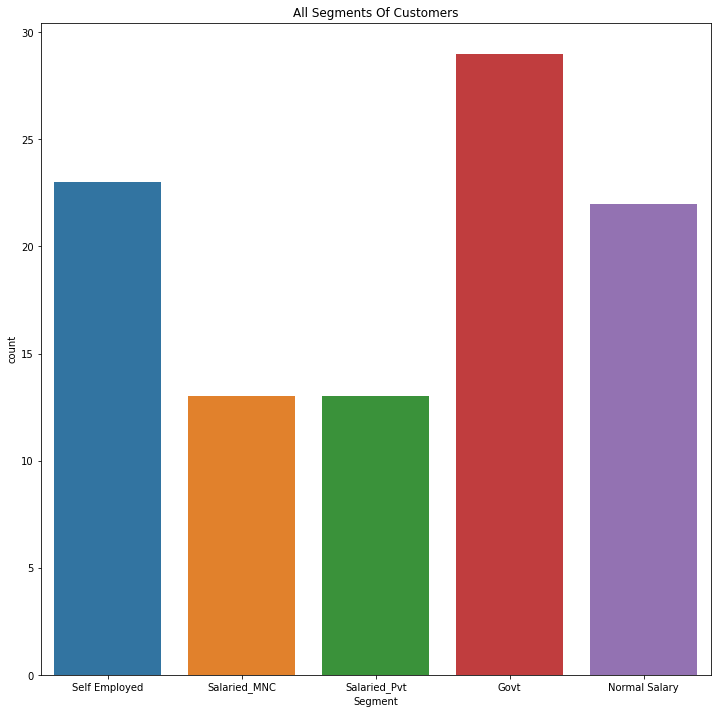

In [38]:
plt.figure(figsize=(12,12))
sns.countplot('Segment',data=customer)
plt.title('All Segments Of Customers')
plt.show()


In [39]:
print('Distinct categories of segments are', len(customer['Segment'].value_counts()))

Distinct categories of segments are 5


# What is the average monthly spend by customers?

In [40]:
spend.head(3)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46


In [41]:
#convert month column to date time format
repay['Month']=pd.to_datetime(spend['Month'])

In [42]:
spend.head(3)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46


In [43]:
repay['Monthly']=repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format='%B'))
repay['Yearly']=repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format='%Y'))

In [44]:
customer_repay_group=round(repay.groupby(['Yearly','Monthly']).mean(),2)

In [45]:
customer_repay_group

SL No:     Amount
Yearly Monthly                     
2004   April      730.50  272055.63
       February   749.50  236745.64
       January    751.62  248839.60
       March      725.50  243941.67
       May        733.50  226604.38
       November   745.50  229386.35
       September  741.50  230077.80
2005   April      730.00  249377.41
       August     749.50  234056.37
       December   762.50  325930.97
       February   750.67  263906.45
       January    746.50  196615.43
       July       757.50  264188.30
       June       755.50  217940.92
       May        747.30  240969.15
       November   749.50  245651.50
       October    760.50  256791.86
       September  759.50  174762.83
2006   April      744.41  239652.37
       August     770.50  263206.93
       December   774.50  204621.00
       February   757.83  249520.69
       January    763.50  242672.03
       July       754.50  204736.56
       June       768.50  324870.03
       March      750.90  255599.07
       May        744.25  253574.37
       November   758.50  245622.96
       October    772.50  271987.88
       September  771.50  264404.01

# If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?

In [46]:
customer_spend_repay=pd.merge(left=customer_spend,right=repay,on='Customer',how='inner')

In [47]:
customer_spend_repay.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_x,SL No:,Month_y,Amount_y,Monthly,Yearly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,1,2004-01-12,495414.75,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,2,2004-01-03,245899.02,January,2004


In [48]:
customer_spend_repay.rename(columns={'Amount_x':'Spend_Amount','Amount_y':'Repay_Amount'},inplace=True)

In [49]:
customer_spend_repay.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Spend_Amount,SL No:,Month_y,Repay_Amount,Monthly,Yearly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,1,2004-01-12,495414.75,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,2,2004-01-03,245899.02,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,3,2004-01-15,259490.06,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,4,2004-01-25,437555.12,January,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,5,2005-01-17,165972.88,January,2005


In [50]:
interest_group=customer_spend_repay.groupby(['Yearly','Monthly'])['Spend_Amount','Repay_Amount'].sum()

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_8988/4052700566.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  interest_group=customer_spend_repay.groupby(['Yearly','Monthly'])['Spend_Amount','Repay_Amount'].sum()


In [51]:
interest_group

Spend_Amount  Repay_Amount
Yearly Monthly                              
2004   April      8.996964e+07  1.877279e+08
       February   9.712613e+07  1.601721e+08
       January    1.110916e+09  1.862556e+09
       March      4.937387e+07  9.675021e+07
       May        6.277974e+07  8.418437e+07
       November   3.896955e+07  8.707376e+07
       September  6.311293e+07  9.108039e+07
2005   April      1.219911e+08  1.883717e+08
       August     1.030419e+08  1.758676e+08
       December   4.708320e+07  1.167666e+08
       February   7.486470e+08  1.105814e+09
       January    1.125537e+08  1.490347e+08
       July       5.443618e+07  1.041658e+08
       June       2.044572e+08  2.657277e+08
       May        5.923259e+08  8.803802e+08
       November   1.653441e+08  2.675928e+08
       October    3.806102e+07  8.441862e+07
       September  3.701584e+07  5.653073e+07
2006   April      3.316001e+08  5.560603e+08
       August     8.789421e+07  1.107554e+08
       December   4.738823e+07  6.213306e+07
       February   1.404428e+08  2.374279e+08
       January    4.906958e+07  8.560870e+07
       July       1.297288e+08  1.512545e+08
       June       5.662796e+07  1.157311e+08
       March      7.081204e+08  1.330487e+09
       May        1.897421e+08  3.490829e+08
       November   1.084492e+08  1.525374e+08
       October    7.738059e+07  9.838252e+07
       September  8.433888e+07  1.012911e+08

In [52]:
interest_group['Monthly Profit']=interest_group['Repay_Amount']-interest_group['Spend_Amount']
interest_group

Spend_Amount  Repay_Amount  Monthly Profit
Yearly Monthly                                              
2004   April      8.996964e+07  1.877279e+08    9.775822e+07
       February   9.712613e+07  1.601721e+08    6.304594e+07
       January    1.110916e+09  1.862556e+09    7.516401e+08
       March      4.937387e+07  9.675021e+07    4.737634e+07
       May        6.277974e+07  8.418437e+07    2.140464e+07
       November   3.896955e+07  8.707376e+07    4.810421e+07
       September  6.311293e+07  9.108039e+07    2.796746e+07
2005   April      1.219911e+08  1.883717e+08    6.638057e+07
       August     1.030419e+08  1.758676e+08    7.282580e+07
       December   4.708320e+07  1.167666e+08    6.968337e+07
       February   7.486470e+08  1.105814e+09    3.571669e+08
       January    1.125537e+08  1.490347e+08    3.648104e+07
       July       5.443618e+07  1.041658e+08    4.972963e+07
       June       2.044572e+08  2.657277e+08    6.127042e+07
       May        5.923259e+08  8.803802e+08    2.880543e+08
       November   1.653441e+08  2.675928e+08    1.022487e+08
       October    3.806102e+07  8.441862e+07    4.635760e+07
       September  3.701584e+07  5.653073e+07    1.951489e+07
2006   April      3.316001e+08  5.560603e+08    2.244602e+08
       August     8.789421e+07  1.107554e+08    2.286115e+07
       December   4.738823e+07  6.213306e+07    1.474483e+07
       February   1.404428e+08  2.374279e+08    9.698509e+07
       January    4.906958e+07  8.560870e+07    3.653912e+07
       July       1.297288e+08  1.512545e+08    2.152571e+07
       June       5.662796e+07  1.157311e+08    5.910316e+07
       March      7.081204e+08  1.330487e+09    6.223664e+08
       May        1.897421e+08  3.490829e+08    1.593408e+08
       November   1.084492e+08  1.525374e+08    4.408826e+07
       October    7.738059e+07  9.838252e+07    2.100193e+07
       September  8.433888e+07  1.012911e+08    1.695226e+07

In [92]:
interest_group['Interest Earned']=(2.9*interest_group['Monthly Profit'])/100
interest_group

Spend_Amount  Repay_Amount  Monthly Profit  Interest Earned
Yearly Monthly                                                               
2004   April      8.996964e+07  1.877279e+08    9.775822e+07     2.834988e+06
       February   9.712613e+07  1.601721e+08    6.304594e+07     1.828332e+06
       January    1.110916e+09  1.862556e+09    7.516401e+08     2.179756e+07
       March      4.937387e+07  9.675021e+07    4.737634e+07     1.373914e+06
       May        6.277974e+07  8.418437e+07    2.140464e+07     6.207344e+05
       November   3.896955e+07  8.707376e+07    4.810421e+07     1.395022e+06
       September  6.311293e+07  9.108039e+07    2.796746e+07     8.110563e+05
2005   April      1.219911e+08  1.883717e+08    6.638057e+07     1.925036e+06
       August     1.030419e+08  1.758676e+08    7.282580e+07     2.111948e+06
       December   4.708320e+07  1.167666e+08    6.968337e+07     2.020818e+06
       February   7.486470e+08  1.105814e+09    3.571669e+08     1.035784e+07
       January    1.125537e+08  1.490347e+08    3.648104e+07     1.057950e+06
       July       5.443618e+07  1.041658e+08    4.972963e+07     1.442159e+06
       June       2.044572e+08  2.657277e+08    6.127042e+07     1.776842e+06
       May        5.923259e+08  8.803802e+08    2.880543e+08     8.353575e+06
       November   1.653441e+08  2.675928e+08    1.022487e+08     2.965213e+06
       October    3.806102e+07  8.441862e+07    4.635760e+07     1.344370e+06
       September  3.701584e+07  5.653073e+07    1.951489e+07     5.659318e+05
2006   April      3.316001e+08  5.560603e+08    2.244602e+08     6.509347e+06
       August     8.789421e+07  1.107554e+08    2.286115e+07     6.629734e+05
       December   4.738823e+07  6.213306e+07    1.474483e+07     4.275999e+05
       February   1.404428e+08  2.374279e+08    9.698509e+07     2.812568e+06
       January    4.906958e+07  8.560870e+07    3.653912e+07     1.059634e+06
       July       1.297288e+08  1.512545e+08    2.152571e+07     6.242456e+05
       June       5.662796e+07  1.157311e+08    5.910316e+07     1.713992e+06
       March      7.081204e+08  1.330487e+09    6.223664e+08     1.804863e+07
       May        1.897421e+08  3.490829e+08    1.593408e+08     4.620883e+06
       November   1.084492e+08  1.525374e+08    4.408826e+07     1.278560e+06
       October    7.738059e+07  9.838252e+07    2.100193e+07     6.090559e+05
       September  8.433888e+07  1.012911e+08    1.695226e+07     4.916156e+05

# What are the top 5 product types?

In [53]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [54]:
spend['Type'].value_counts().head()

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

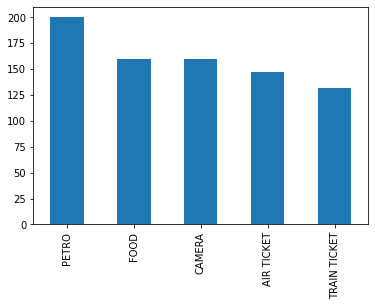

In [55]:
spend['Type'].value_counts().head().plot(kind='bar')
plt.show()

# Which city is having maximum spend?

In [56]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07


In [57]:
city_spend=customer_spend.groupby('City')['Amount'].sum().sort_values(ascending=False)
city_spend

City
COCHIN        45963513.50
CALCUTTA      41108132.30
BANGALORE     40461647.02
BOMBAY        28603127.38
CHENNAI       22128635.65
TRIVANDRUM    15337155.87
PATNA         15260586.97
DELHI         10918286.54
Name: Amount, dtype: float64

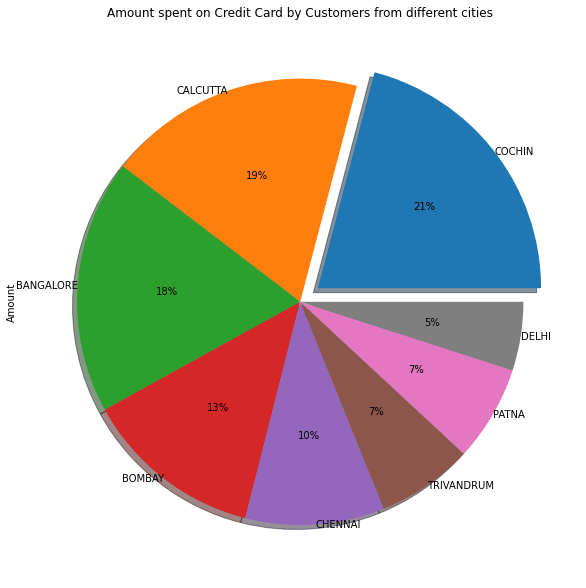

In [58]:
plt.figure(figsize=(10,12))
city_spend.plot(kind='pie',autopct='%1.0f%%',shadow=True,labeldistance=1.0,explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
plt.title('Amount spent on Credit Card by Customers from different cities')
plt.show()

In [59]:
print('From above Pie chart we can see that Cochin is having maximum spend.')

From above Pie chart we can see that Cochin is having maximum spend.


# Which age group is spending more money?

In [60]:
# new column Age Group with 8 bins b\w 18 to 88
customer_spend['Age Group']=pd.cut(customer_spend['Age'],bins=np.arange(18,88,8),labels=['18-26','26-34','34-42','42-50','50-58','58-66','66-74','74-82'],include_lowest=True)
customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,74-82
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,74-82
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,74-82
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,74-82
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,74-82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,50-58
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00,50-58
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50,50-58
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00,34-42


In [61]:
age_spend=customer_spend.groupby('Age Group')['Amount'].sum().sort_values(ascending=False)
age_spend

Age Group
42-50    53242390.70
34-42    38037826.50
26-34    30553459.81
18-26    25233896.65
50-58    22454066.68
74-82    19770884.32
66-74    17705877.44
58-66    12782683.13
Name: Amount, dtype: float64

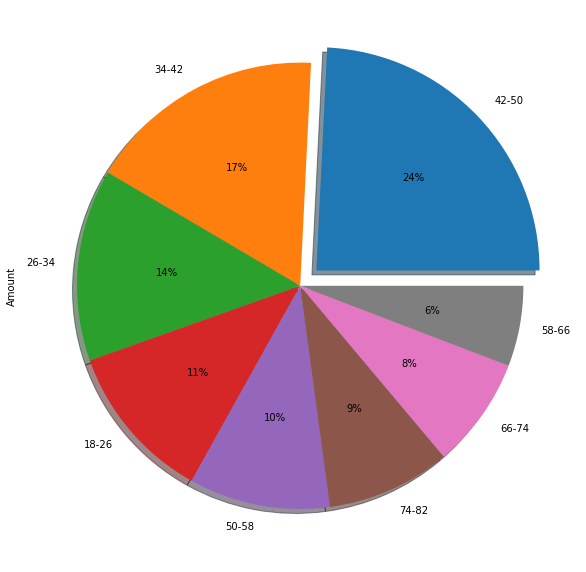

In [99]:
plt.figure(figsize=(10,12))
age_spend.plot(kind='pie',autopct="%1.0f%%",explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0],shadow=True)
plt.show()

In [63]:
print('From above PIE Chart Age Group 42-50 is spending more moneey')

From above PIE Chart Age Group 42-50 is spending more moneey


# Who are the top 10 customers in terms of repayment?

In [64]:
customer_repay.groupby('Customer')[['Amount']].sum().sort_values(by="Amount",ascending=False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


# Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [65]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,74-82
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,74-82
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,74-82
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,74-82
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,74-82


In [66]:
customer_spend['Month']=pd.to_datetime(customer_spend['Month'])

In [67]:
customer_spend['Year']=customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format='%Y'))
customer_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group,Year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-82,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-82,2004


In [68]:
customer_spend_pivot=pd.pivot_table(data=customer_spend,index=['City','Year'],columns='Product',aggfunc='sum',values='Amount')
customer_spend_pivot

Product                 Gold    Platimum      Silver
City       Year                                     
BANGALORE  2004   9289878.54  1112732.30  1291852.58
           2005  12892362.99   912284.97   830612.34
           2006  12030611.09   685831.27  1415480.94
BOMBAY     2004   6987853.53   897264.94   532089.03
           2005   8983018.28   711804.94   508988.54
           2006   7917144.31   972130.01  1092833.80
CALCUTTA   2004   7477140.98  2037690.30   500006.00
           2005  10303355.80  4434696.31   440147.06
           2006  11167532.77  3589606.66  1157956.42
CHENNAI    2004   1059618.50  3535652.38   282056.86
           2005   3740945.58  5053956.32   377184.49
           2006   2704288.62  5024923.40   350009.50
COCHIN     2004   7315850.15  3419904.07   814229.62
           2005  12110613.03  4960921.71   652269.38
           2006  10499142.38  4920592.29  1269990.87
DELHI      2004   2806495.00   283512.89   768172.30
           2005   1964845.27   494157.86   612311.21
           2006   2957103.32   176788.72   854899.97
PATNA      2004   2072567.90  1113069.60   756684.10
           2005   3252615.77  2883231.07   950094.19
           2006   2276181.69  1256137.65   700005.00
TRIVANDRUM 2004   2415102.84  2161676.67   209667.48
           2005   1240375.85  3601443.30   269912.99
           2006   2735710.87  2147403.75   555862.12

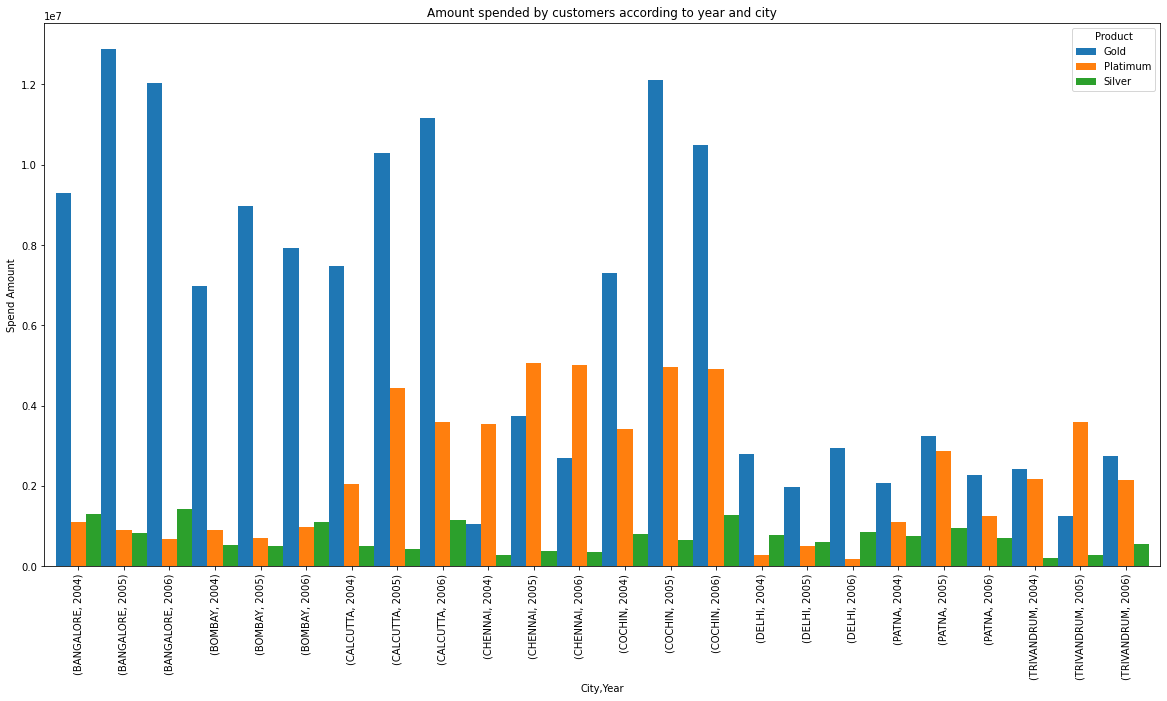

In [69]:
customer_spend_pivot.plot(kind='bar',figsize=(20,10),width=1)
plt.ylabel('Spend Amount')
plt.title('Amount spended by customers according to year and city')
plt.show()

# Create graphs for

# Monthly comparison of total spends, city wise

In [70]:
customer_spend['Monthly']=customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format='%B'))
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group,Year,Monthly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-82,2004,January
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-82,2004,January
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,74-82,2004,January
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,74-82,2004,January
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,74-82,2005,January


In [72]:
monthly_city=customer_spend.groupby(['Monthly','City'])[['Amount']].sum().sort_index().reset_index()
monthly_city

,Monthly,City,Amount
0,April,BANGALORE,4207980.48
1,April,BOMBAY,1873785.01
2,April,CALCUTTA,3457507.95
3,April,CHENNAI,2518656.99
4,April,COCHIN,3882744.94
...,...,...,...
91,September,CHENNAI,745759.40
92,September,COCHIN,1382242.90
93,September,DELHI,50001.00
94,September,PATNA,70329.95


In [73]:
monthly_city=pd.pivot_table(data=customer_spend,values='Amount',index='City',columns='Monthly',aggfunc='sum')
monthly_city

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


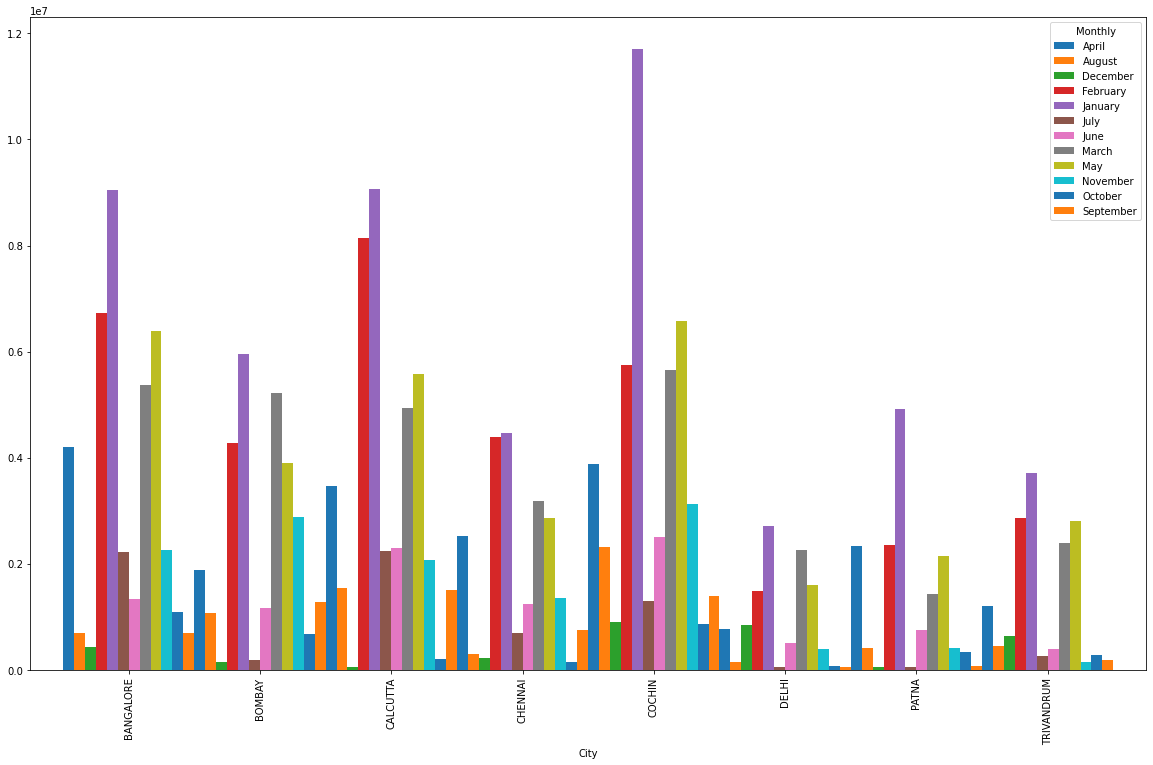

In [74]:
monthly_city.plot(kind='bar',figsize=(20,12),width=1)
plt.show()

Comparison of yearly spend on air tickets

In [75]:
customer_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group,Year,Monthly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-82,2004,January
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-82,2004,January


In [77]:
air_tickets=customer_spend.groupby(['Year','Type'])[['Amount']].sum().reset_index()
air_tickets.head()

,Year,Type,Amount
0,2004,AIR TICKET,4357225.35
1,2004,AUTO,254745.28
2,2004,BIKE,476635.28
3,2004,BUS TICKET,5822074.21
4,2004,CAMERA,10122819.72


In [78]:
filtered=air_tickets.loc[air_tickets['Type']=='AIR TICKET']
filtered

,Year,Type,Amount
0,2004,AIR TICKET,4357225.35
15,2005,AIR TICKET,10550152.21
30,2006,AIR TICKET,5248469.56


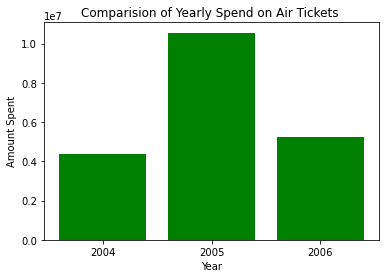

In [82]:
plt.bar(filtered['Year'],height=filtered['Amount'],color='green')
plt.xlabel('Year')
plt.ylabel('Amount Spent')
plt.title('Comparision of Yearly Spend on Air Tickets ')
plt.show()

# Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [84]:
customer_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group,Year,Monthly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-82,2004,January
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-82,2004,January


In [86]:
product_wise=pd.pivot_table(data=customer_spend,index='Product',columns='Monthly',values='Amount',aggfunc='sum')
product_wise.head()

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,13170572.59,4954030.42,2332940.96,24779179.55,32413831.83,5167416.37,6538862.64,19256972.48,21548169.76,9203267.46,3018223.38,3816887.62
Platimum,5182493.86,1714762.80,750156.19,9134054.58,14951578.51,1288156.26,2965712.71,7288837.68,8151926.49,2741618.42,550275.04,1667840.84
Silver,1902322.65,293109.82,200537.90,2087018.37,4206383.62,530153.72,689537.61,3909405.83,2140940.01,691102.63,100001.50,442803.13


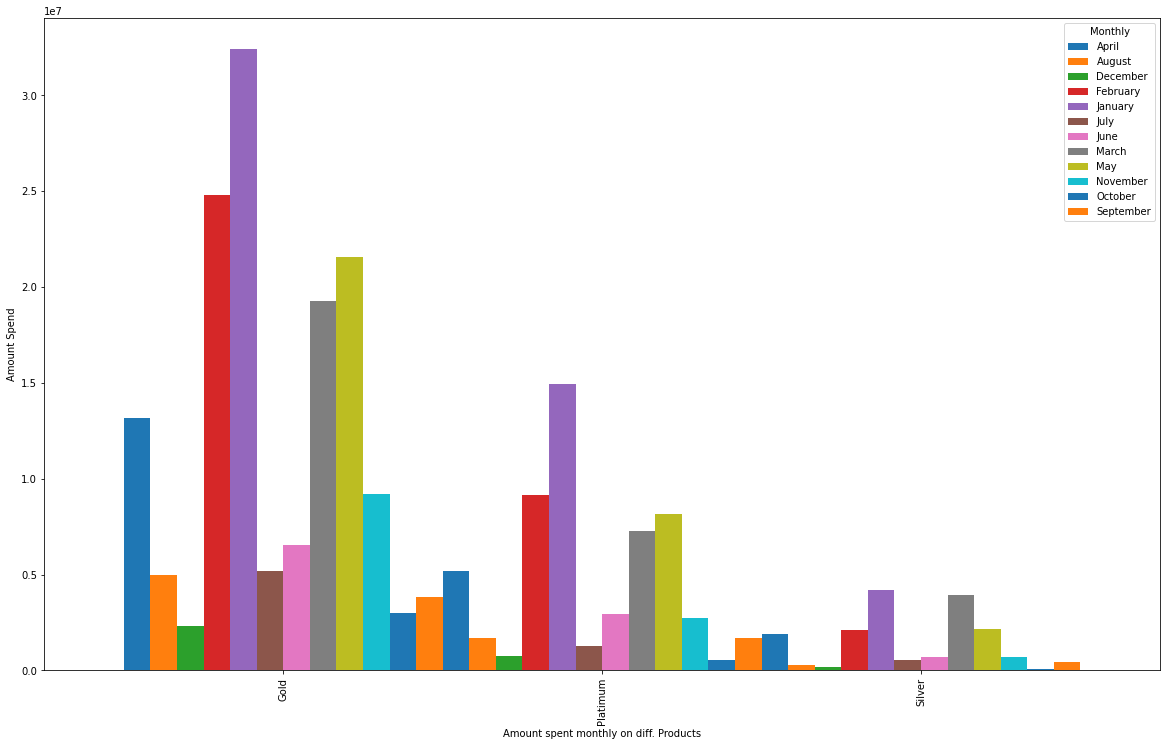

In [87]:
product_wise.plot(kind='bar',figsize=(20,12),width=1)
plt.ylabel('Amount Spend')
plt.xlabel('Amount spent monthly on diff. Products')
plt.show()

# Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [89]:
customer_repay.head(2)

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,1,A1,12-Jan-04,495414.75,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A1,03-Jan-04,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [91]:
customer_repay['Month']=pd.to_datetime(customer_repay['Month'])

In [93]:
customer_repay['Monthly']=customer_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format='%B'))
customer_repay['Yearly']=customer_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format='%Y'))

In [94]:
def top10Customers(product_category,time_period):
    return customer_repay.loc[(customer_repay.Product == product_category)].groupby(['Customer','City','Product',time_period]).Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)


In [95]:
product_category=str(input('Please Enter Product Category should be in Gold/Silver/Platinum: '))
time_period=str(input('Please Enter Time Period and time period should be in Yearly/Monthly: '))

Please Enter Product Category should be in Gold/Silver/Platinum: Gold
Please Enter Time Period and time period should be in Yearly/Monthly: Yearly


In [97]:
top10Customers_Analysis=top10Customers(product_category,time_period)
top10Customers_Analysis

,Customer,City,Product,Yearly,Amount
64,A61,COCHIN,Gold,2005,4276860.55
55,A44,DELHI,Gold,2005,4165317.77
58,A45,COCHIN,Gold,2005,4042447.57
52,A43,BANGALORE,Gold,2005,4006956.60
13,A13,BANGALORE,Gold,2005,3757673.00
65,A61,COCHIN,Gold,2006,3744127.41
61,A60,CALCUTTA,Gold,2005,3742856.10
14,A13,BANGALORE,Gold,2006,3477314.89
38,A29,CALCUTTA,Gold,2006,3434298.00
35,A28,TRIVANDRUM,Gold,2006,3376614.65
